# Lecture 4.2: Linear Regression

This lecture, we are going to use linear regression to predict the happiness of countries.

**Learning goals:**

- solve a regression problem
- fit a linear regression model
- predict using a linear regression model
- visualize the predictions of a linear regression model

## 1. Introduction


The United Nations (UN) thinks that machine learning can save the world, and has asked us to _predict_ the happiness of countries. 🌍 That's quite a task! Luckily, we have some help: a dataset mapping life expectancy to a happiness score. All we have to do is apply linear regression to predict this score, and we should have a model able to predict national happiness! ☺️


## 2. Data Munging

As always, let's load the `.csv` dataset and have a look:

In [1]:
import pandas as pd

df = pd.read_csv('world_happiness_report.csv')
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [2]:
df.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


That's a lot of columns. We're only interested in _life expectancy_ (our features) and _happiness score_ (our labels). Weird! The values of life expectancy are between 0 & 1! Most other columns also have surprising ranges. This is because the data is _normalized_, meaning it is reshaped to fit a more convenient interval. This is common data preprocessing, so always keep an eye on your summary statistics when using a new dataset! In our case, this won't affect our linear regression model, so we can use these values directly:

In [3]:
features = df['Health..Life.Expectancy.']
labels = df['Happiness.Score']

We have two pandas `Series` for our features and labels. sklearn gets a bit confused when the features data is a _vector_ , since the usual scenario is to have _many_ features stored in a matrix. In our case we only have one feature, the life expectancy. So let's force it into a matrix using [`np.reshape()`](https://numpy.org/devdocs/reference/generated/numpy.reshape.html).

You can see in the documentation that we can use the argument `-1` to refer to the existing dimension. Since we are taking a ($N$) dimensional vector and we want to transform it in a ($N \times 1$) dimensional matrix, we can do it as such:

In [4]:
X = features.values.reshape(-1, 1)
y = labels.values

We also renamed our features and labels to the convention when fitting supervised learning models: the mathematical notation for our feature matrix $X$ and our label vector $y$.

## 3. Training

Let's now train our linear regression model! sklearn does all the gradient descent optimization magic for us. You might remember from the slides that this includes:
1. randomly initializing the model parameters $\theta$
2. estimating the cost function for that initial model $J$
3. calculating the derivative of the cost function at that point $\frac{dJ}{d\theta}$
4. taking a step proportional to the negative of that derivative $-\alpha \frac{dJ}{d\theta}$
5. going back to step 2 until the cost function has reached a minimum $\frac{dJ}{d\theta} \approx 0$

Thankfully we don't have to do it ourselves! Instead, sklearn offers the same api as most other learning algorithms: `.fit()` on the data, then `.predict()`


In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)

... that's it 😅? Remember that the equation for this linear model with one feature is :

$$ h_{\theta}(\textbf{x}) = \theta_{0} + \theta_{1} x$$

So we can check our optimized model parameters. in sklearn, the intercept $\theta_{0}$ is separated from all the other model parameters, the coefficients $\theta_{i}$.

Let's look at the intercept:

In [8]:
theta_0 = reg.intercept_
theta_0

3.296855685378315

And our only coefficient:

In [9]:
theta_1 = reg.coef_[0]
theta_1

3.731201709128991

This means that our hypothesis was optimized through gradient descent to :

$$ h_{\theta}(\textbf{x}) = 3.297 + 3.731 x$$

Since we only have _one_ feature, we can plot this model on a 2D graph. On the x-axis, life expectancy, on the y-axis, happiness score. The data is represented as points, the model as a green line.


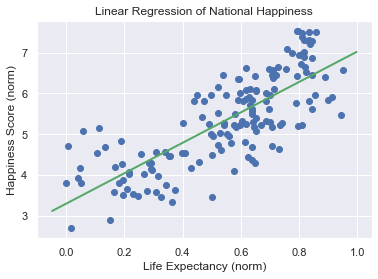

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


def add_line(ax, theta_0, theta_1):
    x_vals = np.array(ax.get_xlim())
    y_vals = theta_0 + x_vals * theta_1
    ax.plot(x_vals, y_vals, linewidth=2, color='g')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X, y)
add_line(ax, theta_0, theta_1)

ax.set_xlabel('Life Expectancy (norm)')
ax.set_ylabel('Happiness Score (norm)')
ax.set_title('Linear Regression of National Happiness');

Wow, life expectancy really matters for a country's happiness! This kind of insights is simple, but has a high impact: modern medecine clearly improves humans' standards of living. Being free from illnesses and child mortality is a major factor in our happiness. Thanks to all the hard working doctors out there! 🙇‍♂️

ℹ️This kind of graph is easy to read and interpret, but often infeasible due to the high number of features $\textbf{x}$. 

## 4. Prediction

The UN likes our regression model, and has an urgent task for us: the Kingdom of Narnia has asked to join the UN, and they can only approve their membership if they know their happiness score! The leader of Narnia, Aslan 🦁, unfortunately doesn't have this data... but he has carried out a census recently and measured the life expectancy of the Narnian population. Let's _predict_ the nation's happiness using our linear regression model. 🔮

The Narnian life expectancy is of 0.777 (in normalized units). sklearn's `.predict()` method expects a matrix again, so let's create a ($1 \times 1$) `ndarray`:

In [11]:
life_expectancy_narnia = 0.777
x_narnia = np.asarray(0.7).reshape(1, 1)

We can then predict the Narnian happiness using the linear regression model that we trained earlier:

In [13]:
y_narnia = reg.predict(x_narnia)
y_narnia

array([5.90869688])

Narnians are 5.909 happy on average! Except "happiness score" is a strange unit, so we have no idea what that means... Instead, we can plot Narnia on our National Happiness graph to compare it to other countries:

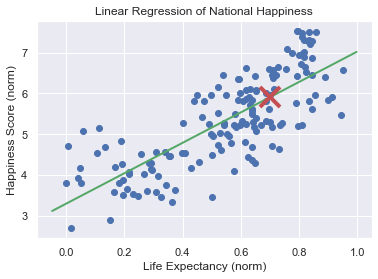

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X, y)
add_line(ax, theta_0, theta_1)
ax.plot(x_narnia, y_narnia, marker='x', markersize=20, markeredgewidth=4, color='r')

ax.set_xlabel('Life Expectancy (norm)')
ax.set_ylabel('Happiness Score (norm)')
ax.set_title('Linear Regression of National Happiness');

The results are now much more obvious: Narnia is a pretty happy nation 😃

## 5. Multi-variate Linear Regression

Thanks to our help, the UN was able to accept Narnia's membership application, but are now facing another issue. The International Monetary Fund (IMF) is not very impressed by our "happiness model". They believe that national economy must surely be a factor in a country's happiness... and our model completely disregards it! 💸 They suggest that we could make our prediction of _happiness score_ even better by adding the `GDP per capita` feature.

Let's re-select our features to include the oddly named `Economy..GDP.per.Capita` column:

In [15]:
features = df[['Health..Life.Expectancy.', 'Economy..GDP.per.Capita.']]
labels = df['Happiness.Score']

This time, no need to `.reshape()` our features, since they are already in matrix form! We don't even have to convert anything to NumPy `ndarrays`, since sklearn also works with `DataFrame`s out of the box. We'll still follow the mathematical naming convention:

In [17]:
X = features
y = labels

Just like univariate linear regression, we first have to `.fit()` our model before we can `.predict()` with it:

In [18]:
reg = LinearRegression().fit(X, y)
theta_0 = reg.intercept_
theta_0

3.0694341836901637

Notice that our intercept, $\theta_{0}$ is slightly different! This means that the addition of a new feature has changed how the hypothesis, $h_{\theta}$, was fit to the data. i.e It looks like our model has improved 💪. Let's look at the coefficients:

In [19]:
theta_i = reg.coef_
theta_i

array([1.59995598, 1.42422897])

Since we have two features, life expectancy & GDP per capita , we now have two coefficients: $\theta_{1}$ & $\theta_{2}$. This means that our gradient descent optimized hypothesis now looks like this:

$$ h_{\theta}(\textbf{x}) = 3.069 + 1.600 x_{1} + 1.424 x_{2}$$

Where $x_{1}$ is our first feature, the life expectancy, and $x_{2}$ is our second feature, the GDP per capita. 

When referring to the linear regression model parameters in a multi-variate setting, we often represent all of them together in a vector:

$$\boldsymbol{\theta} = \begin{bmatrix} \theta_{0} \\ \theta_{1} \\ \theta_{2}  \end{bmatrix} = \begin{bmatrix} 3.069 \\ 1.600 \\ 1.424  \end{bmatrix} $$

Let's do that with our theta values:


In [20]:
theta = np.append([theta_0], theta_i)
theta

array([3.06943418, 1.59995598, 1.42422897])


It's hard to imagine what the model looks like with only with those three parameters... but since we are _only_ using two features, we can still visualize it in a 3 dimensional graph! On the x-axis, the life expectancy, on the y-axis, the GDP per capita, and on the z-axis, the happiness score. The data is still represented as blue points, and the model's predictions now form a two dimensional _plane_ , defined by the equation for $h_{\theta}$ above, and represented by the green grid:

<IPython.core.display.Javascript object>


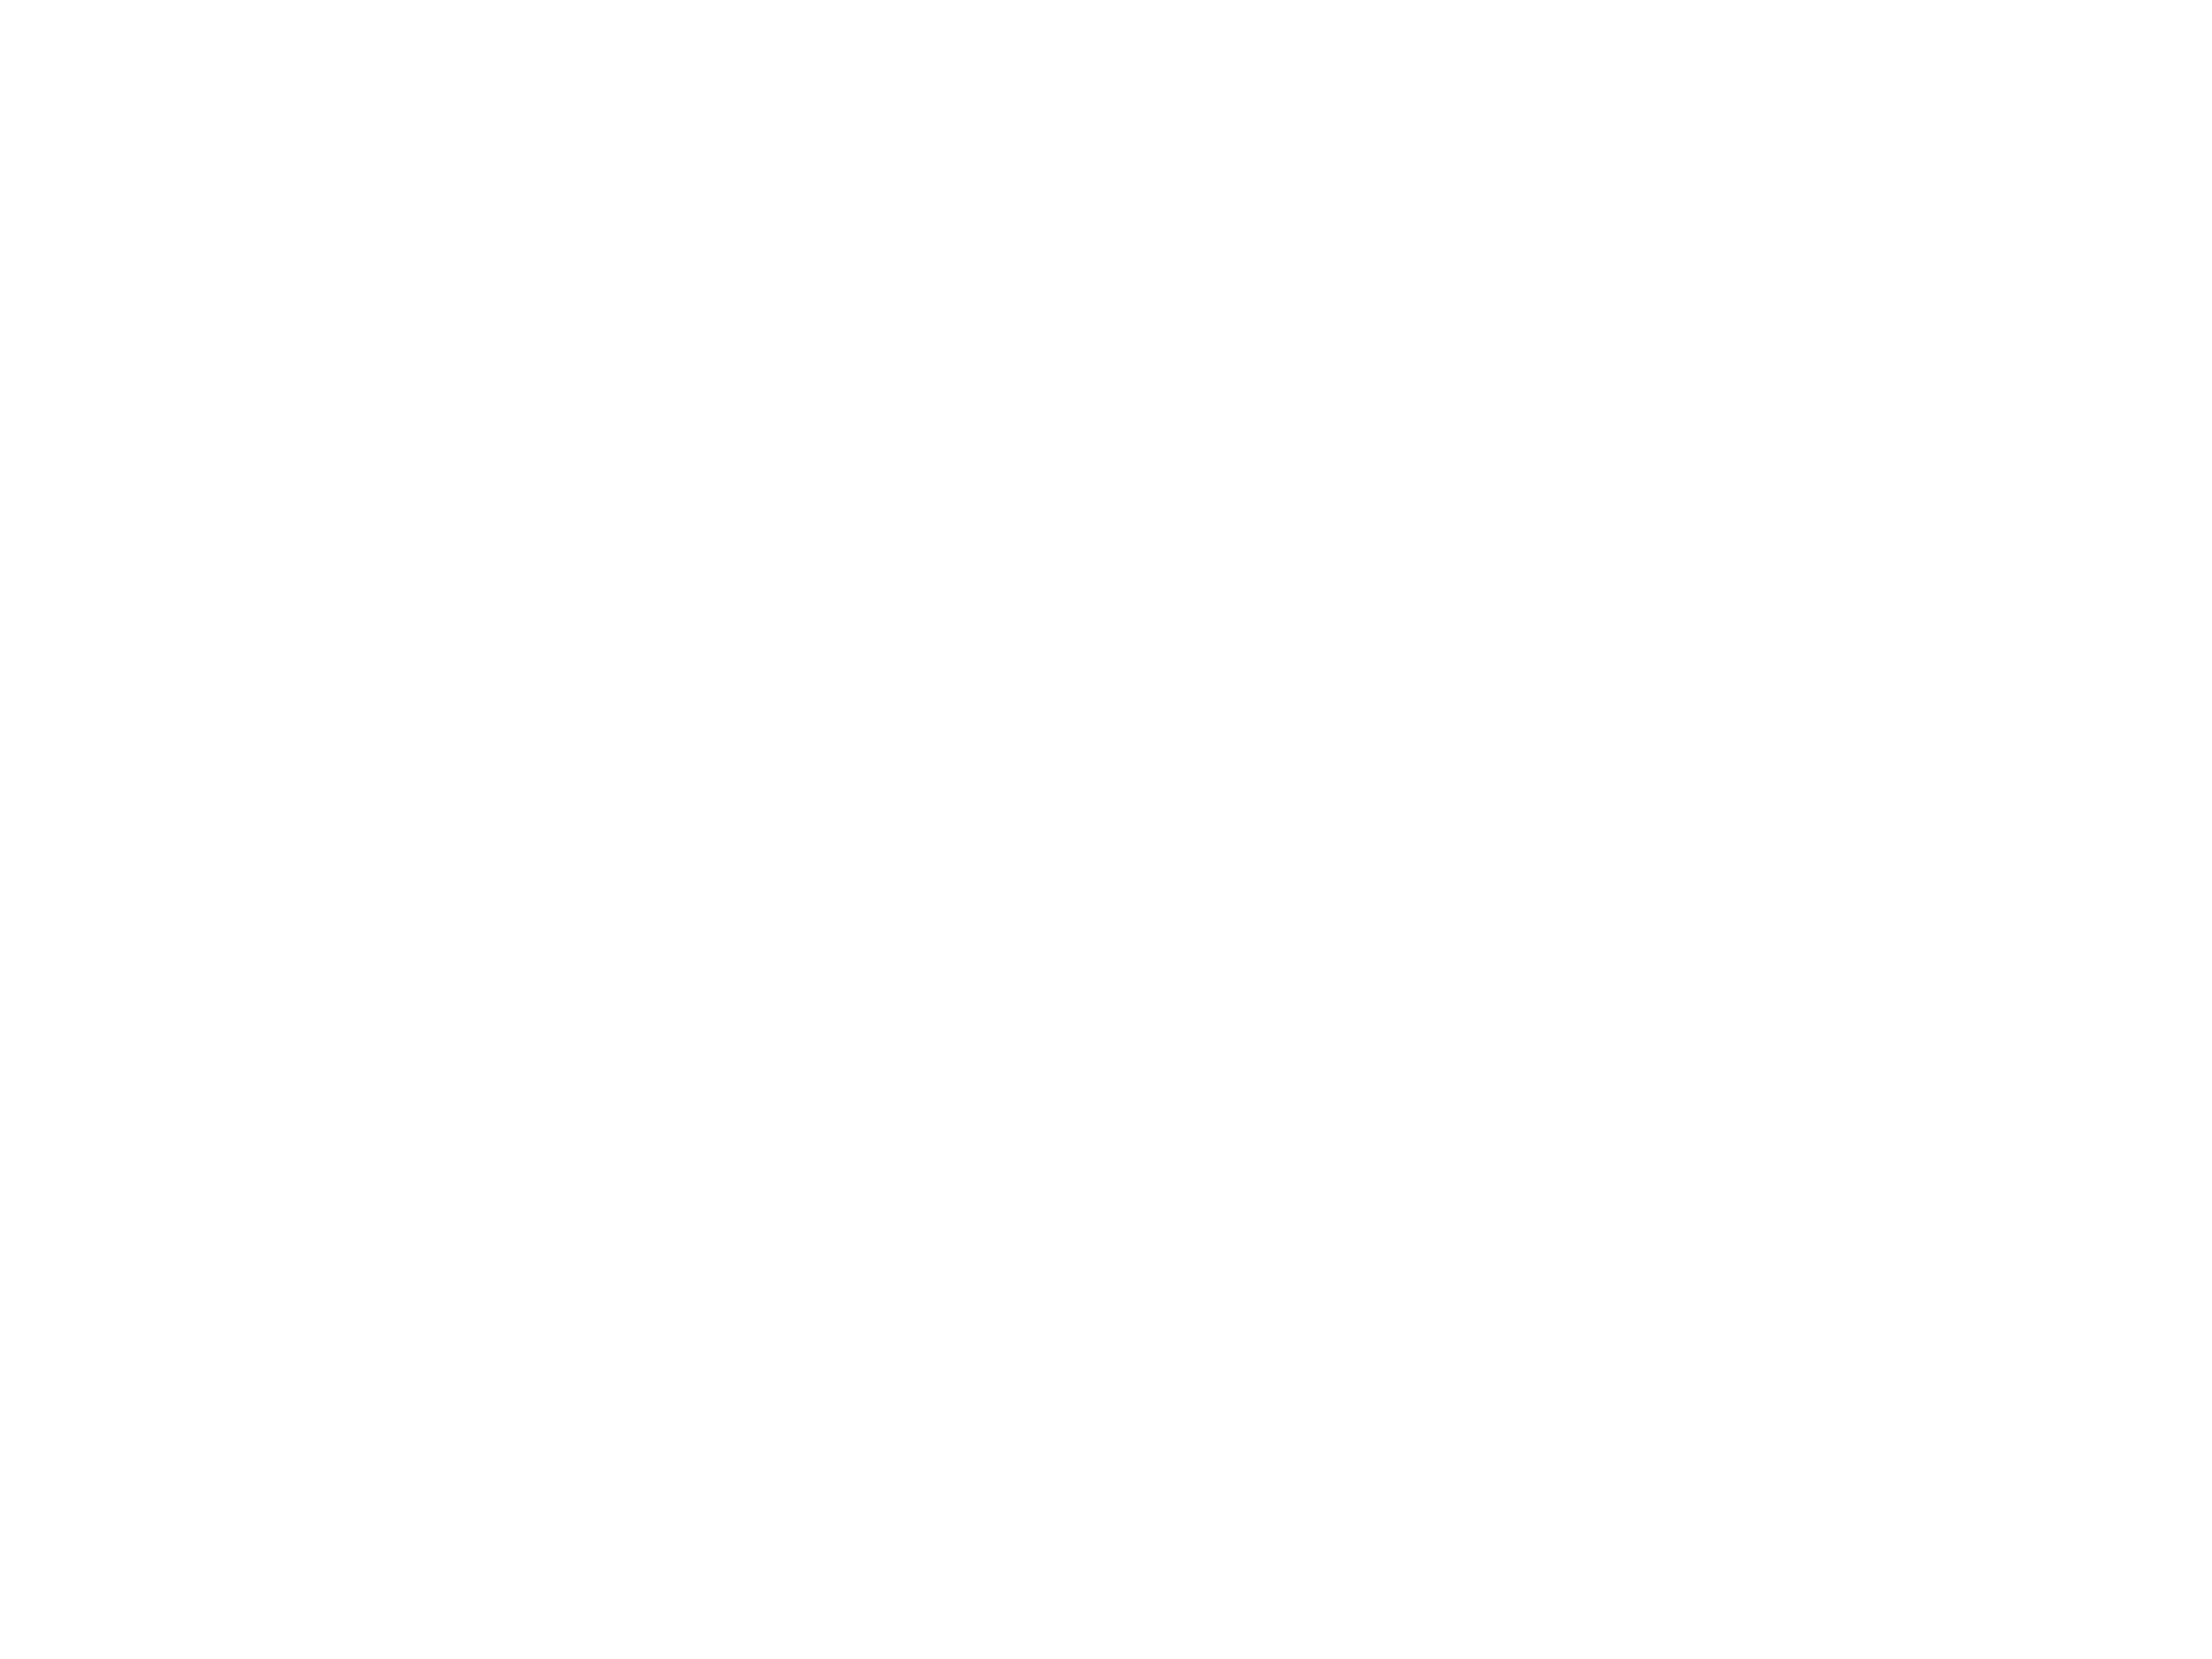

<IPython.core.display.Javascript object>


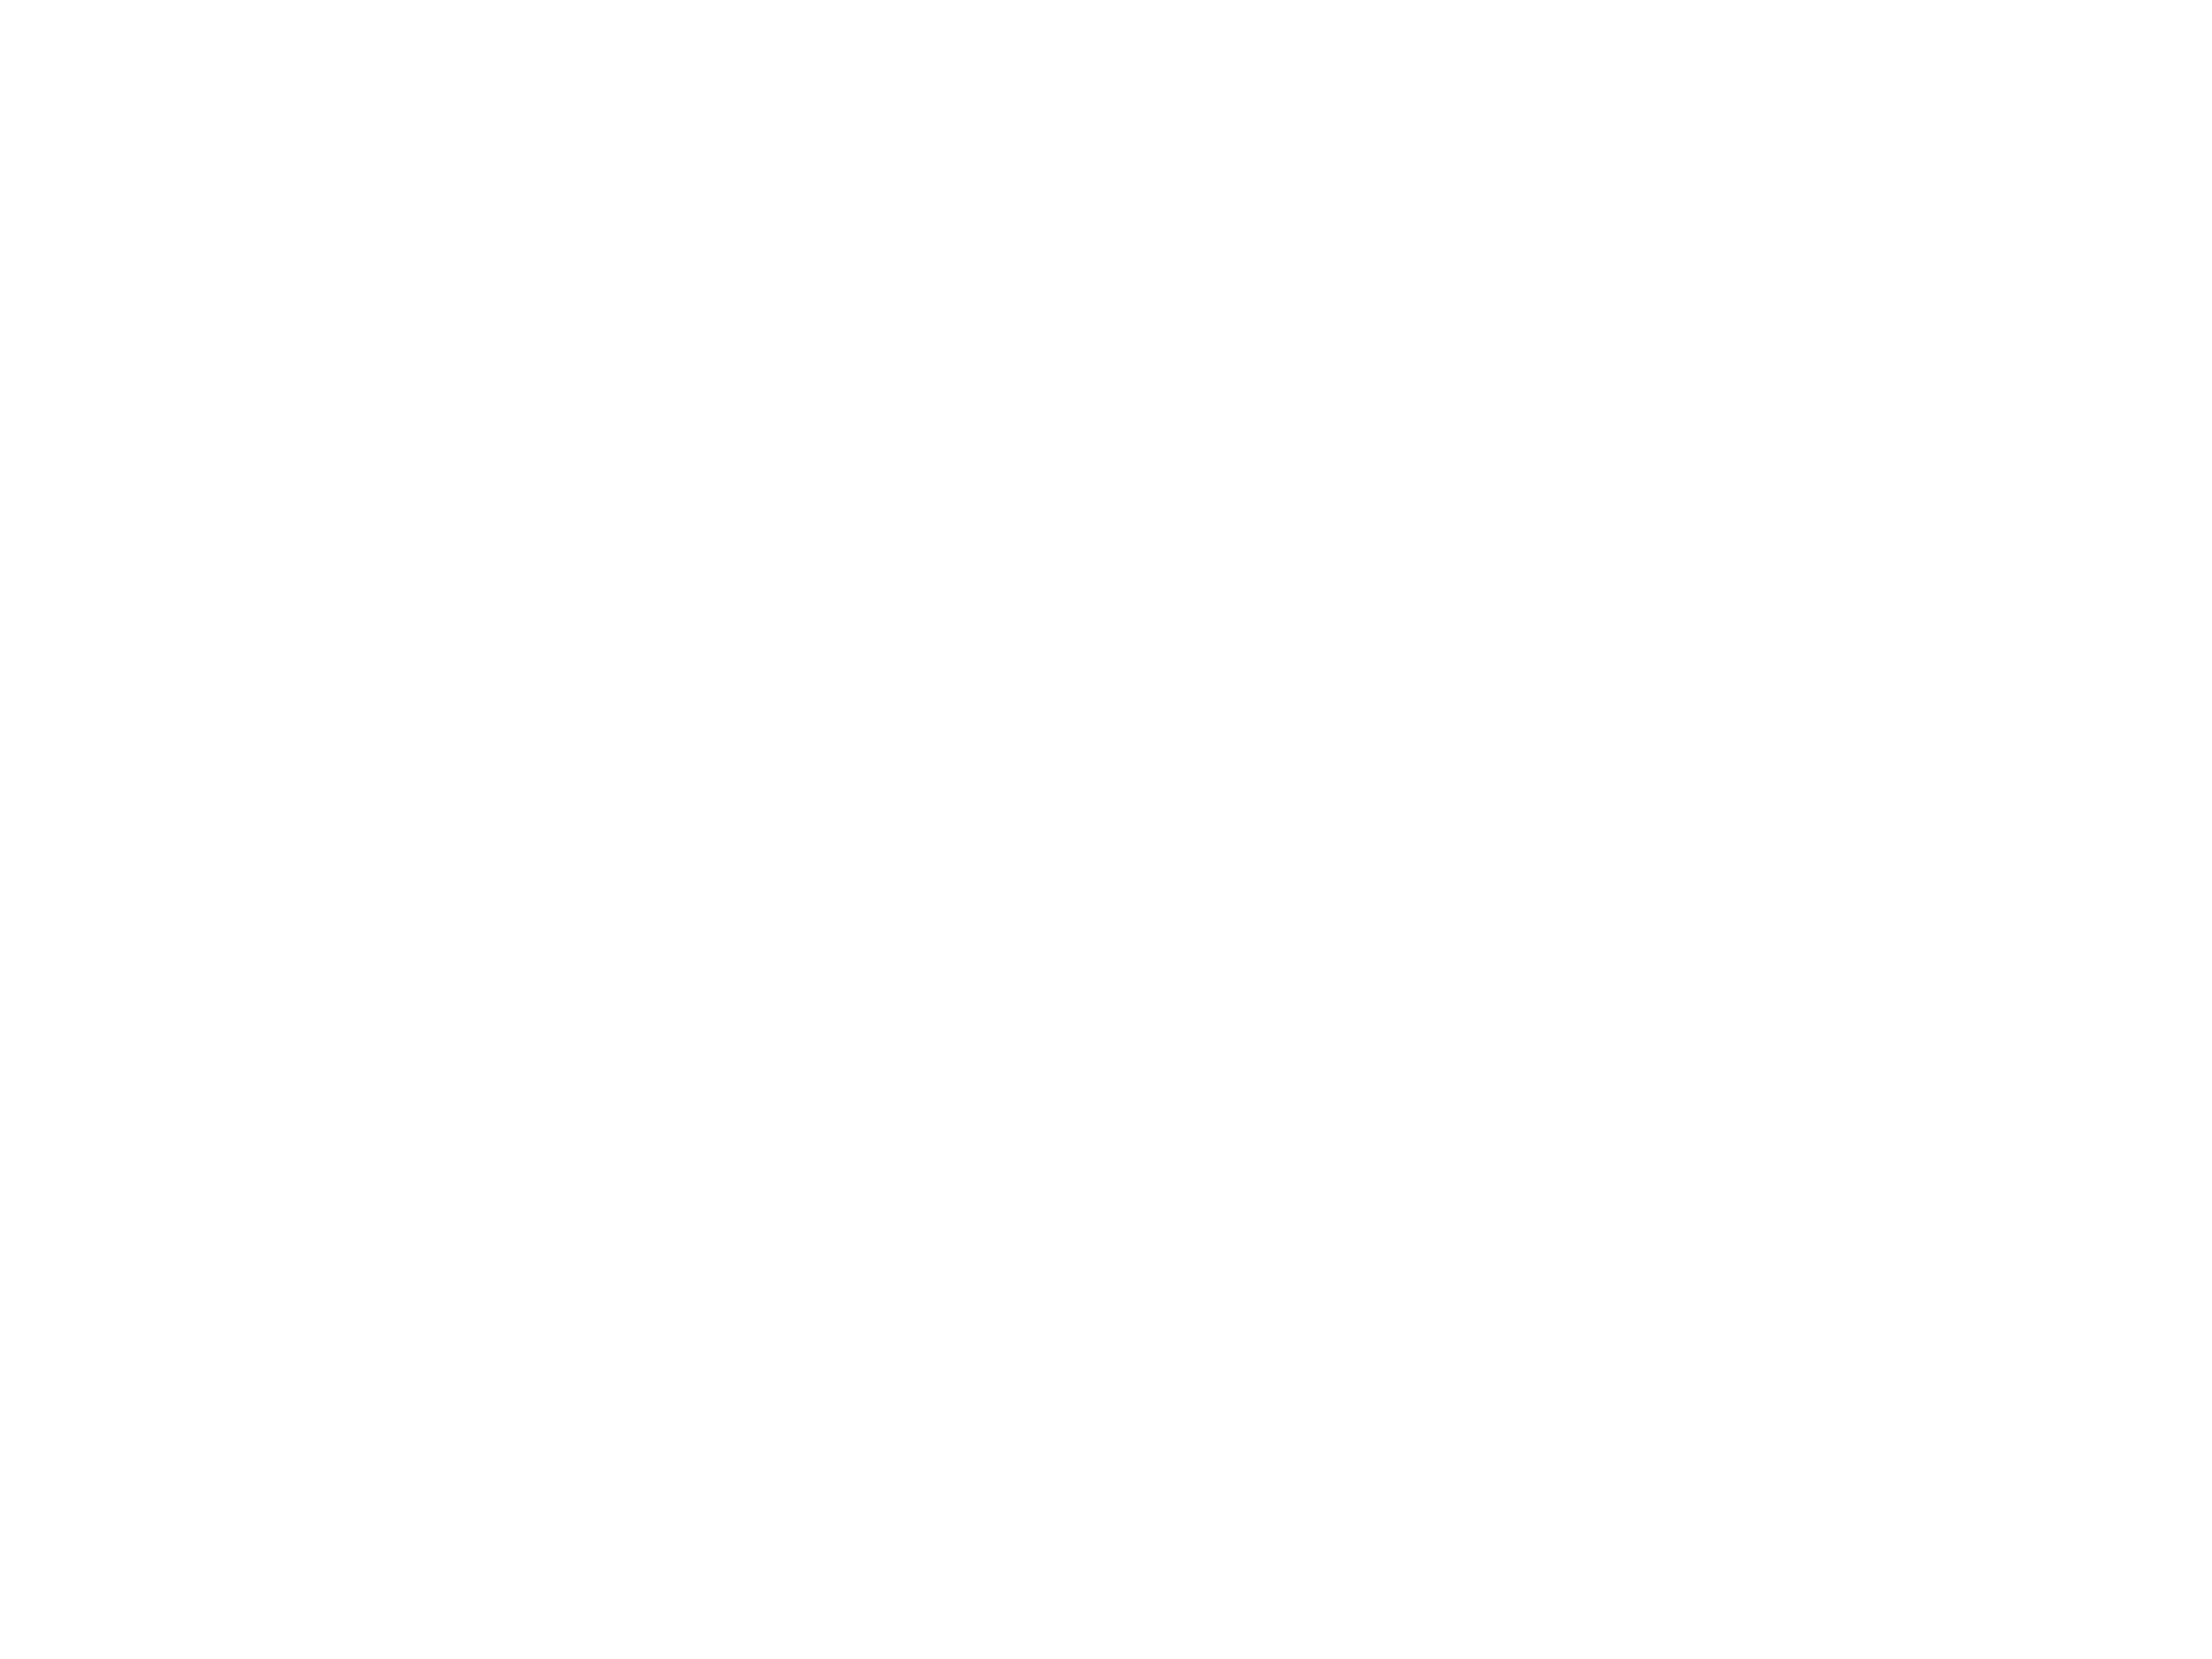

In [22]:
%matplotlib notebook
from mpl_toolkits import mplot3d

def create_mesh(theta):
    x_values = np.linspace(0, 1, 50)
    y_values = np.linspace(0, 2, 50)
    x_mesh, y_mesh = np.meshgrid(x_values, y_values)
    z_mesh = theta[0] + theta[1] * x_mesh + theta[2] * y_mesh
    return x_mesh, y_mesh, z_mesh
    
x_mesh, y_mesh, z_mesh = create_mesh(theta)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(X.iloc[:, 0], X.iloc[:, 1], y)
ax.plot_wireframe(x_mesh, y_mesh, z_mesh, rstride=5, cstride=5, alpha=0.4, color='g')
ax.set_title('Multi-variate Linear Regression of National Happiness')
ax.set_xlabel('Life Expectancy (norm)')
ax.set_ylabel('GDP per Capita (norm)')
ax.set_zlabel('Happiness Score');


That's a good looking model 😏 Looks like the IMF was right! Take some time to think about what is represented, and how is in common with the 2D graph. Can you tell how our features _correlate_ with the label?

🧠🧠 How is this model limited? Can you think of ways to improve its prediction accuracy?

ℹ️ Whilst this is a perfectly fine example of a 3D graph, there are other python librairies better equipped for this kind of advanced visualization, e.g [plotly express](https://plotly.com/python/3d-scatter-plots/#3d-scatter-plot-with-plotly-express).

🧠 The kingdom of Hyrule has life expectancy = 0.666, and GDP per capita of 0.888. How would you _graphically_ read the predicted happiness score for this nation?

💪 Now try to use your trained linear regression model to predict the happiness score of Hyrule quantitatively. Save the prediction as a variable called `y_hyrule` in the cell below.
Pro-tip: think of the _shape_ that the sklearn method expects as argument. You can find an example in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
import math 

life_expectancy = 0.666
gdp_per_capita = 0.888

# INSERT YOUR CODE HERE

def test_predict():
    print(y_hyrule % 0.001)
    assert math.isclose(y_hyrule % 0.001, 0.00072019, rel_tol=1e-04), f'Incorrect value of y_hyrule, try again!'
    print('Success! 🎉')
    return y_hyrule

test_predict()


## 6. Data Governance & Domain Understanding

After successfully helping the UN, you might be wondering what "happiness score" really means... and you should be! This dataset was taking from the [world happiness report](https://worldhappiness.report/). If you dig into the details, you'd realise that the "happiness score" was _calculated_ from various national metrics, using a _linear equation_. No wonder our predictions looked good! 

We were trying to fit a linear model to a value created... using a linear model. If we had _all_ the metrics used in the original calculation, we would recover the original linear equation, and perfectly fit the data. i.e all the data would align in a perfect line. Our exercise would then be futile, as the optimal linear hypothesis would be already be available... it's the happiness score! 🤦‍♀️

This is a good example of the importance of _data governance_ and _domain understanding_. A data scientist must know _where_ the data came from and _how_ it was transformed, and this is only possible with proper data engineering. What's more, they must understand _what_ the data represents in the real world, to appreciate the task at hand and its consequences. 

Put together, this might avoid an IRL situation where one tries to model a linear model with linear regression! 🙃 


## 7. Summary


Today, we learned about our first supervised learning algorithm: **linear regression**. First, we re-stated the regression task with **mathematical notation**. We then discovered the **cost function**, which measures a model's errors across a dataset. We walked through an example of the **mean squared error cost function** on a toy problem about cats and internet procrastination. 😸 This lead us to defining **linear models** qualitatively and mathematically. We had all the tools to explain **gradient descent**, an iterative numerical method for **minimizing** the cost function. We understood that it's this optimization procedure which allows the model to **learn** the best hypothesis to predict data accurately. Finally, we put this to **practice** by fitting univariate and multivariate sklearn `LinearRegression` models to the World Happiness Report dataset.

# Resources 

## Core Resources

- [Machine Learning on Coursera - Linear Regression](https://www.coursera.org/lecture/machine-learning/model-representation-db3jS)  
Andrew Ng's always excellent course is particularly insightful for this section on Linear Regression.
- [Gradient descent visualization](https://github.com/Shathra/gradient-descent-demonstration)  
A simple and clear visualization of gradient descent for finding function minima.
- [World happiness report - kaggle dataset](https://www.kaggle.com/unsdsn/world-happiness)  
The dataset used in this notebook.

## Additional Resources

- [Gradient descent derivation](https://mccormickml.com/2014/03/04/gradient-descent-derivation/)  
A mathematical derivation of gradient descent with accompanying graphs.
- [3D gradient descent visualization](https://xavierbourretsicotte.github.io/animation_ridge.html)  
A more involved visualization of gradient descent in 3D.
- [Siraj - how to do linear regression using gradient descent](https://youtu.be/XdM6ER7zTLk)  
Code-along video from Siraj on building linear regression optimization from scratch.
- [Karpathy's loss function tumblr](https://lossfunctions.tumblr.com/)  
A curated collection of the world's most beautiful or strange loss functions.